In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib
import scipy.stats
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
# Pretty Plots
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set(font='serif', font_scale=1.4)
sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})
def setup_plot():
    fig = plt.figure(dpi=100, figsize=(5.0,3.0))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 15)
    ax.tick_params(direction='in')

In [3]:
N_doors = 5
eps_exp = 0.2
eps_obs = 0.2
T = 2000

In [4]:
def sample_obs(a, best_door, eps=eps_obs):
    if a == best_door:
        return np.random.binomial(n=1, p=1-eps)
    else:
        return np.random.binomial(n=1, p=eps)

In [5]:
def likelihood(obs, a, door, eps=eps_obs):
    if a == door:
        if obs == 1:
            return 1 - eps
        else:
            return eps
    else:
        if obs == 1:
            return eps
        else:
            return 1 - eps

In [6]:
def compute_seq_score(eps_obs, eps_exp, a_prob=False, T=T, N_trials=100):
    correct = np.zeros(T)
    for i in range(N_trials):
        prior = np.ones(N_doors) / N_doors
        door = np.random.choice(np.arange(N_doors))
        a = np.random.choice(np.arange(N_doors))
        if a == door:
            correct[0] += 1
        for t in range(1, T):
            obs = sample_obs(a, door, eps_obs)
            post = prior
            for d in np.arange(N_doors):
                if not a_prob:
                    post[d] = prior[d] * likelihood(obs, a, d, eps_obs)
                else:
                    if a == d:
                        post[d] = prior[d] * likelihood(obs, a, d, eps_obs) * (1 - eps_exp) 
                    else:
                        post[d] = prior[d] * likelihood(obs, a, d, eps_obs) * (eps_exp) / (N_doors - 1)
            post = post / np.sum(post)
            a = np.argmax(post)
            if np.random.uniform() < eps_exp: # swap
                l = [x for x in np.arange(N_doors) if x != a]
                a = np.random.choice(l)
            prior = post
            if a == door:
                correct[t] += 1
    correct = correct / (N_trials)
    return correct

In [9]:
res = np.zeros((10, 10))

In [10]:
for i in range(1, 10):
    for j in range(1, 10):
        print(i, j)
        eo = 0.1 * i
        ee = 0.1 * j
        correct = compute_seq_score(eo, ee, a_prob=True)
        res[i, j] = correct[-1]

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


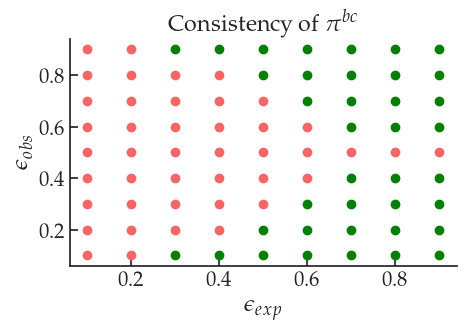

In [31]:
setup_plot()

for i in range(1, 10):
    for j in range(1, 10):
        eo = 0.1 * i
        ee = 0.1 * j
        if 1 - res[i, j] > ee + 0.12 or eo == 0.5:
            plt.scatter(ee, eo, color='#f96565')
        else:
            plt.scatter(ee, eo, color='#008000')

plt.xlabel("$\\epsilon_{exp}$")
plt.ylabel("$\\epsilon_{obs}$")
plt.title("Consistency of $\pi^{bc}$")
plt.savefig("bc_ave.pdf", bbox_inches='tight')

In [24]:
res2 = np.zeros((10, 10))

In [25]:
for i in range(1, 10):
    for j in range(1, 10):
        print(i, j)
        eo = 0.1 * i
        ee = 0.1 * j
        correct = compute_seq_score(eo, ee, a_prob=False)
        res2[i, j] = correct[-1]

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


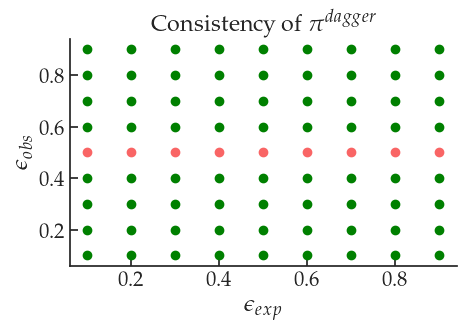

In [32]:
setup_plot()

for i in range(1, 10):
    for j in range(1, 10):
        eo = 0.1 * i
        ee = 0.1 * j
        if 1 - res2[i, j] > ee + 0.12 or eo == 0.5:
            plt.scatter(ee, eo, color='#f96565')
        else:
            plt.scatter(ee, eo, color='#008000')

plt.xlabel("$\\epsilon_{exp}$")
plt.ylabel("$\\epsilon_{obs}$")
plt.title("Consistency of $\pi^{dagger}$")
plt.savefig("dagger_ave.pdf", bbox_inches='tight')

In [47]:
onq = compute_seq_score(0.3, 0.2, a_prob=False)

In [48]:
offq = compute_seq_score(0.3, 0.2, a_prob=True)

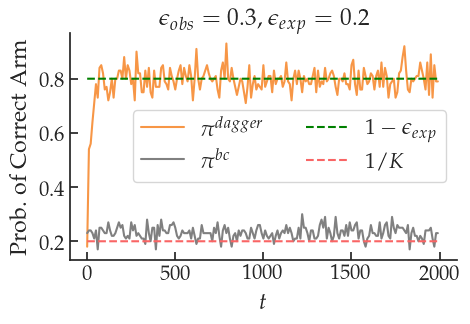

In [51]:
setup_plot()
plt.plot(np.arange(0, 2000, 10), onq[::10], color="#F79646", label="$\pi^{dagger}$")
plt.plot(np.arange(0, 2000, 10), offq[::10], color="grey", label="$\pi^{bc}$")
plt.plot([0.8] * len(onq), linestyle="--", color="#008000", label="$1 - \epsilon_{exp}$")
plt.plot([1 / N_doors] * len(onq), linestyle="--", color="#f96565", label="$1/K$")
plt.xlabel("$t$")
plt.ylabel("Prob. of Correct Arm")
plt.title("$\epsilon_{obs}=0.3$, $\epsilon_{exp}=0.2$")
plt.legend(ncol=2)
plt.savefig("cb_ave.pdf", bbox_inches='tight')
plt.show()